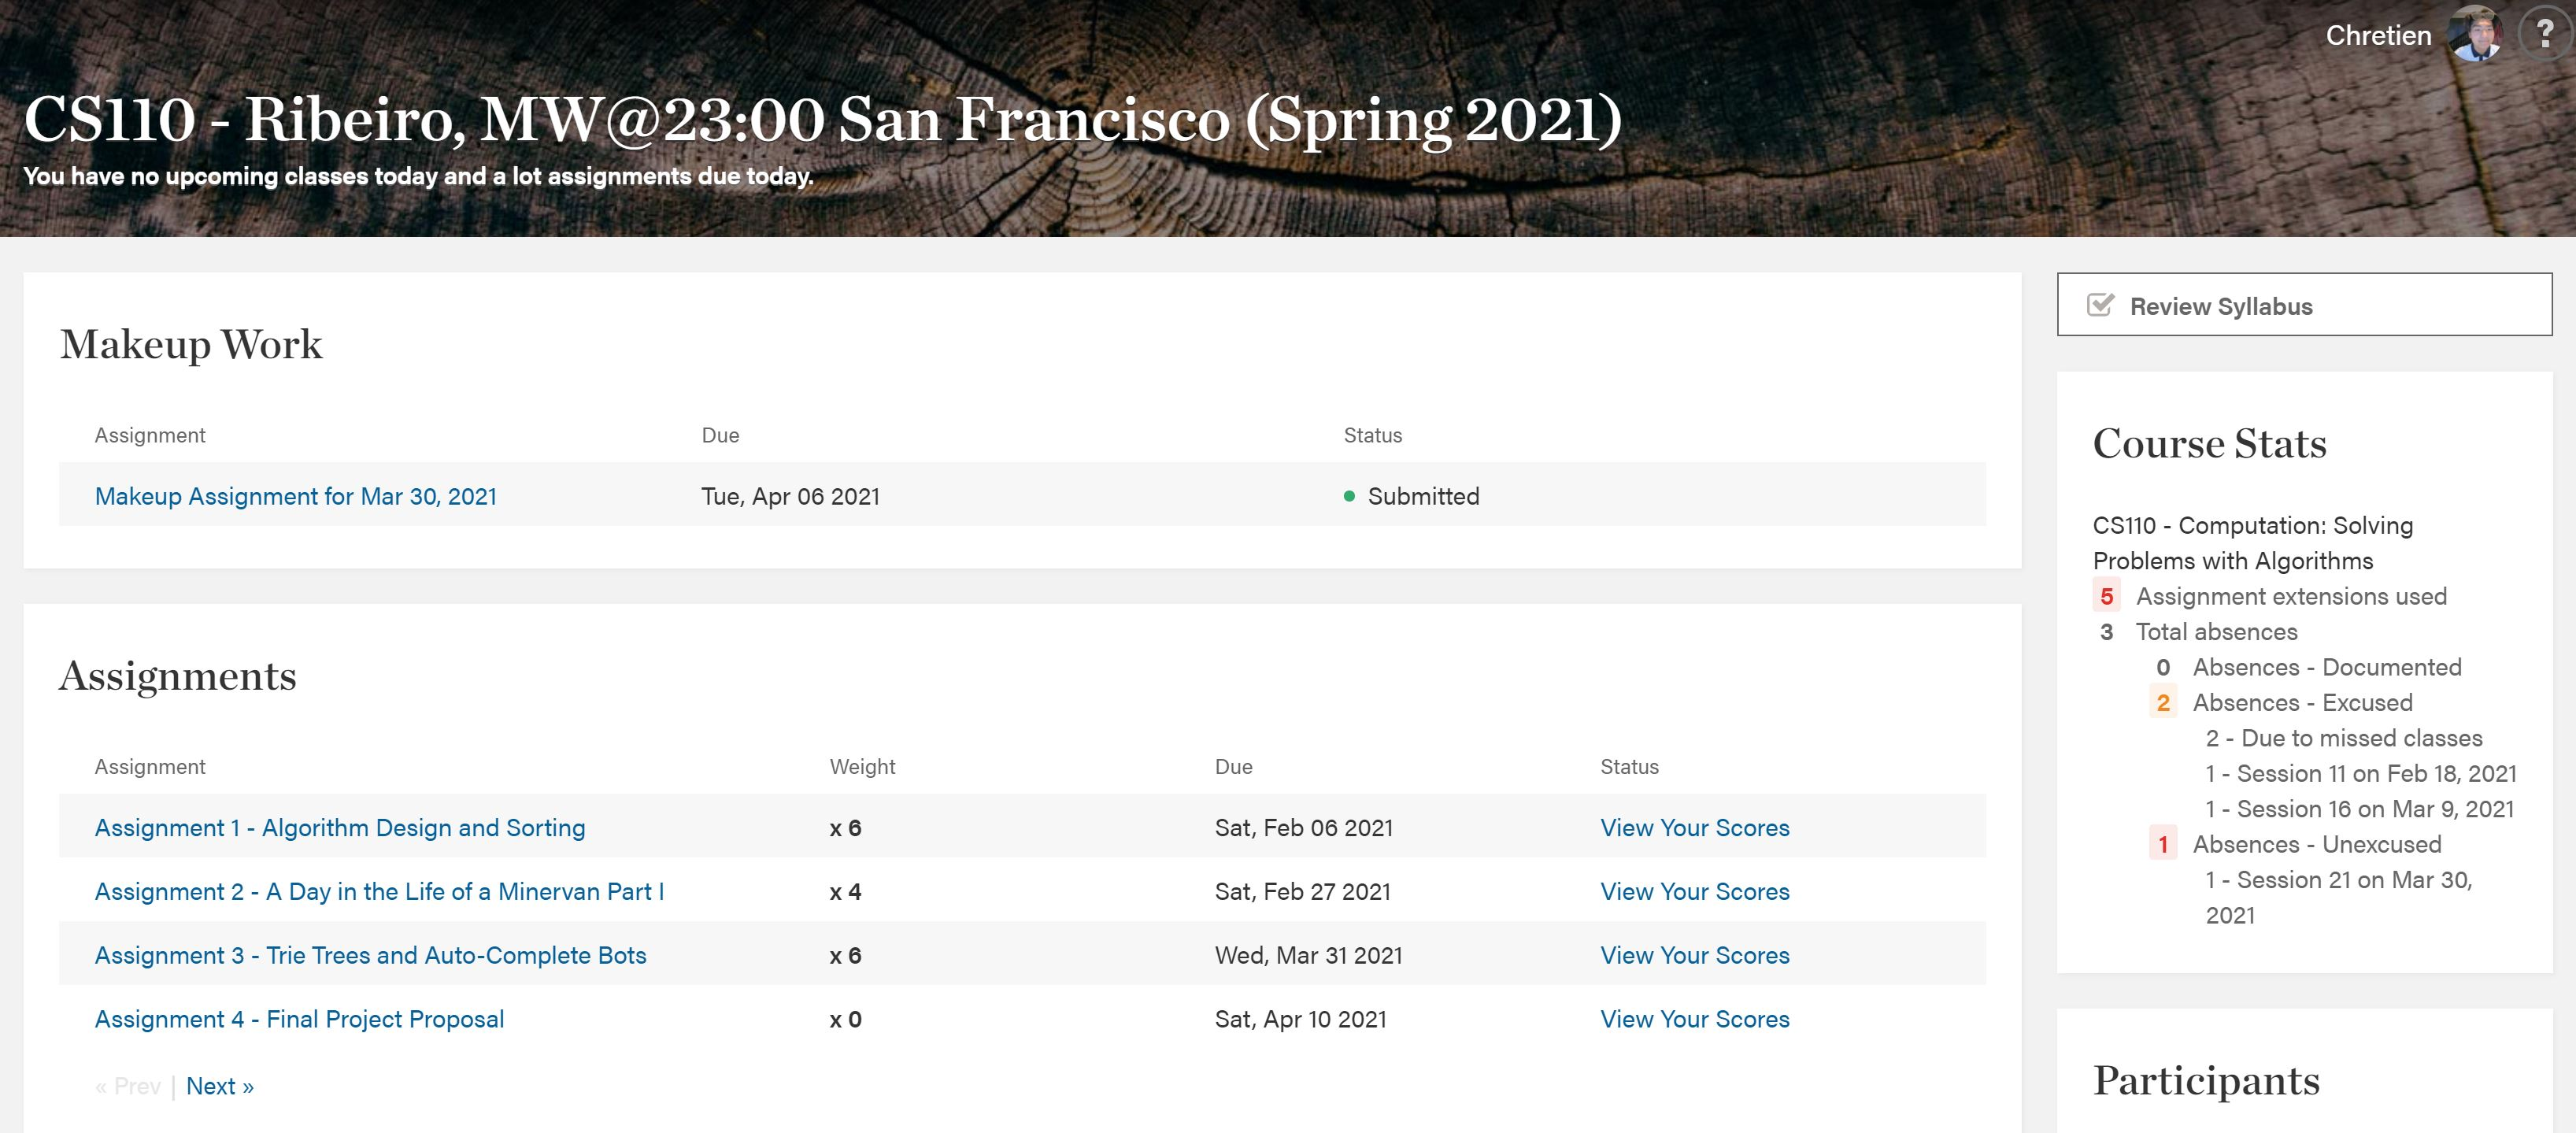

In [346]:
from IPython.display import Image

#all makeup work is completed just waiting for excusal
Image(filename= r"C:\Users\chrec\Documents\CS110\Assignments\Untitled Folder\professionalism.JPG")

Author: Chretien Li
Date: April 24, 2021 KST
Full Code: https://github.com/Chrecci/CS110_Merkle_Tree_Final_Li_Chretien/upload/main

For my final project, I decided to tackle the problem: "how can we create a decentralized transaction system." While initially sounding vague, this problem is much more fascinating and important than it seems. Let's start with an example. When Abby pays Ben 100USD through the bank, a banker is there to verify the transaction. Why? Because the bank has to ensure the transaction isn't fraudulent. They have to make sure the check isn't forged, or else they run the risk on Abby sending the same 100USD over and over again. The fact that cash, unlike digital payments, can't be double spent, makes them secure in that sense, but the world is justified in transitioning to digital payment methods: it's faster, more convenient, and can not be broken. However, back to the Abby scenario, digital payments are even riskier than checks in a sense because we're really entirely on digital systems to ensure transactions don't occur twice (or multiple times). This is known as the double spending problem. Digital payments today are still verified, but largely thanks to a central system: the bank. If we think of the system as a network, a bank is a central node with every customer an external node. In order for a customer to reach another, they must first pass through the security and system of a multi-billion dollar organization. This is rather safe, and hackers will have a hard time infiltrating or disrupting the network. Now, what if we dreamed of a system with no centralization: a decentralized, digital, payment system. The nodes now are all radically interconnected; however, connections in the network can easily be tampered with. There is no longer central authority to say what is right or wrong. This fascinating problem is what inspired Ralph Merkle to patent the Merkle Tree in 1987. If a decentralized digital payment system sounds familiar, that's because Satoshi Nakamoto harnessed the efficiencies and power of Merkle Trees to build Bitcoin, the originator of cryptocurrencies.

However, Merkle Trees are not just used in cryptocurrencies. They're the backbone of many Peer-to-peer networks, coders and project starters will appreciate it's utilization in Git/Github, healthcare systems etc. Virtually any system where it benefits to not have a bunch of man/computer-power over-looking every digital transaction. For more on the basics of what a Merkle tree is, and how it actually works (notably in blockchain technology), see here: https://www.codementor.io/blog/merkle-trees-5h9arzd3n8 (this article also explains concepts such as how to validate and useful graphics, I highly recommend).

In our case, the most important aspects of a decentralized transaction system are it's security and speed of verification for individual users/transactions. Contrast to what our focus on most algorithms are, the actual time-complexity of building the tree is pretty irrelevant. There are plenty of very powerful machines that will easily compute a tree of any meaningful length of transaction history. Blocks with transactions in the order of 1x10^6 are already pretty questionable in terms of storage on a blockchain, and quadrillions or quintillions of transactions likely won't be happening anytime soon, but even so, those are manageable by the top computer systems of the world. However, the concern is that the average transactioner does not have that same computational power, or anywhere close. The reason this matters is because for any decentralized system to work, users have to be able to trust the system; that their transaction is secure and valid. We have to be able to offer them some kind of proof, not just say "yes it's valid, trust us." As such, if this proof is two burdensome, requiring even several megabytes of storage, then users likely will not be attracted to it. Thus, the speed and efficiency of transaction verification itself is very important, second to obviously, the security itself. If the system can be easily tampered with or altered, no one will buy into the decentralized system.

For this reason, I chose two data strucutres. As mentioned before, a Merkle Tree, and a hashed list. Both were primarily selected for their utilization of hashing. With hashing, we have a mechanism to ensure that if any tampering occured, we can easily notice a change in the final hash. However, hashing is only as good as its hashing function. Thus, in this work, I will employ a double SHA-256 hashing algorithm. How good it is? Well for starters it likely won't be solved anytime within a few universe-lives (for more on SHA-256 see here: https://qvault.io/cryptography/how-sha-2-works-step-by-step-sha-256/). It's also effective due to its speed of calculation. Lastly, as I will explain in more detail later one, we will test the speed of verfication for both algorithms. The inputs for both data structures are identical, a list of transactions, with each transaction being a string.

In [347]:

#For a test demo using this class please refer to Appendix A

import math
import hashlib
#https://bitcoin.stackexchange.com/questions/69018/merkle-root-and-merkle-proofs

#ok so new idea. I store all nodes into a dictionary, with the node as key and index as value.
#Then, when i want to see if an item is in my tree, search is O(1) time (hash table), then just return
#that index, or better yet, the NODE
#by storing the leaves of our hash binary tree themselves into a hash table, everything is faster
#I think way to go is two classes, one for node itself, other for tree
#Each node we record its parent, and two children

class Node_M:
    """
    Class to initialize nodes in Merkle tree
    
    Attributes
    ----------
    left : str
        str of left hash, to be combined with right
    right : str
        str of right hash, ro be combined with left
    parent : Node_M
        parent node, each node only has 1 parent (except root node, no parent)
    children : lst, Node_M
        list of children nodes, each node has two children (except leaf, empty list)
    tree_index : int
        index of node in tree
    sibling : Node_M
        the sibling node, every node has 1 (except root node, no sibling)
    hash : str
        str of first hashing of left+right strings
    dub_hash str
        str of hashing hash, the second hash
        
    """
    def __init__(self, left = None, right = None, parent = None):
        
        """
        Class initialization method.
        
        """
        
        #this is the actual value of the node
        self.left = left
        
        self.right = right
        
        #who it's parent node is
        self.parent = parent  
        
        #who the children nodes are
        self.children = []
        
        #index in our merkle tree
        self.tree_index = 0
        
        self.sibling = None
        
        #in our merkle tree we're going to use a double-hash
        #we're that intense, and Bitcoin does it too so ye
        self.hash = hashlib.sha256((self.left + self.right).encode('utf-8')).hexdigest()
        self.dub_hash = hashlib.sha256(self.hash.encode('utf-8')).hexdigest()

               

class merkle_tree:
    """ 
    This class implements properties and methods that support a Merkle Tree
    Data Structure
    
    Input
    ----------
    transactions : list, str
        A Python list where transactions to be inserted into merkle tree are stored
        
    Attributes
    ----------
    transactions : list, str
        A Python list where transactions to be inserted into merkle tree are stored
        
    tree : dict {hash: Node_M}
        Dictionary of hashes of nodes as keys, and the value being Nodes themselves
    
    merkle_root : str
        The merkle root of the tree
        
    depth : int
        The depth of the Merkle Tree, defined by log_2 of number of entries
    """ 
    
    def __init__(self, transactions):
        
        """
        Initializes the Merkle Tree. Immediately calls to self.initialize_tree() method
        
        """
        self.transactions = transactions
        self.tree = {}
        self.merkle_root = None
        self.depth = int(math.log(len(transactions), 2))
        
        self.initialize_tree(self.transactions)
    
    #simple function that double hashes a value with SHA-256
    def dub_hasher(self, to_hash):
        temp = hashlib.sha256(to_hash.encode('utf-8')).hexdigest()
        dub_hashed = hashlib.sha256(temp.encode('utf-8')).hexdigest()
        return dub_hashed
    
    def initialize_tree(self, transactions):
        
        #our Merkle Tree will only accept n inputs that satisfie 2^n = integer. 
        #this is because every node must have a sibling node until they build up to root
        if math.log(len(transactions), 2).is_integer() and self.transactions:
            for transaction in self.transactions:
                #print (transaction)
                self.insert_leaf_node(transaction)
            self.build_tree()
        else:
            print("Invalid Number of Entries in Tree")
    
    #creates a node for every initial transaction, stores in .tree() dictionary
    def insert_leaf_node(self, transaction):
        
        #because leaf nodes have no siblings, set left to nothing, just hashing the transaction itself
        temp = Node_M(left = "", right = transaction)
        self.tree[temp.dub_hash] = temp
        
    #This function is actually responsible for building the tree up. We have n transactions, and every
    #transaction is hashed. Two sibling nodes are combined then rehashed to form parent node
    def build_tree(self):
        
        #initialize variables
        length = len(self.tree)
        i = 0
        remain = length
        #print(self.tree.keys())
        
        #a while loop is called. Essentially, the tree forms itself while also updating at the same time
        #so long as there are items left in the tree, we continue building it up. We stop once no more
        #sibling nodes, that is, only one parent node remains: the Merkle Root
        while remain>0:
            
            #create new nodes while at the same updating the Node itself as well as the tree
            #iterate through by pairs
            idx = list(self.tree.keys())[i]
            idx_2 = list(self.tree.keys())[i+1]
            
            #new_node is the new parent node
            new_node = Node_M(left = self.tree[idx].dub_hash, right = self.tree[idx_2].dub_hash)
            new_node.child = [self.tree[idx], self.tree[idx_2]]
            self.tree[new_node.dub_hash] = new_node
            
            #add new_node as both node's parents
            self.tree[idx].parent = new_node
            self.tree[idx_2].parent = new_node
            
            #add both nodes as each other's sibling
            self.tree[idx].sibling = self.tree[idx_2]
            self.tree[idx_2].sibling = self.tree[idx]
            
            #index not with python index but regular, from 1 to n
            #now we don't have to search through dictionary/list of indexes to find index, better run-time
            self.tree[idx].tree_index = i+1
            self.tree[idx_2].tree_index = i+2
            
            i += 2
            
            #refresh length of tree
            length = len(self.tree)
            remain = length - (i+1)
            
        #merkle root is last item in dictionary
        self.merkle_root = list(self.tree.keys())[-1]
        return self.tree
    
    #this method firstly checks if user input is indeed a valid transaction in our tree
    #Because a merkle tree is a binary tree, and the path taken is strictly a vertical one
    #the authetification path is size log(n)
    def auth_path(self, check):
        hashed = self.dub_hasher(check)
        global path 
        path = []
        global transaction_index
        transaction_index = self.tree[hashed].tree_index
        
        #the "in" operator here actually functions in O(1) time. Since self.tree is a dictionary
        #python merely looks up the value in a hash table
        if hashed in self.tree:
            path.append(self.tree[hashed].sibling.dub_hash)
            
            #if it's confirmed that transaction exists, use method path_finder to return the proof of 
            #verification
            return self.path_finder(hashed)
        else:
            print ("Sorry, this transaction does not exist")
    
    #A recursive algorithm is used to derive the path proof
    def path_finder(self, search_value):
        #print(path)
        
        #base case, successfully reached root
        if self.tree[search_value].parent.parent == None:
            #print ("Your transaction exists at index: " + str(transaction_index) + '\n'
                   #+ "Autentification Path: " + str(path))
            return (transaction_index, path)
        
        #the next item in the path to validate will be the parent's sibling
        else:
            parent = self.tree[search_value].parent
            parent_sibling = parent.sibling
            path.append(parent_sibling.dub_hash)
            
            #recursively call to next item in path
            return self.path_finder(parent_sibling.dub_hash)
       
    #this function serves to allow a user to confirm the merkle root, if they choose to do so
    def validate(self, to_test):
        if self.merkle_root == to_test:
            print("It's a match. Correct Merkle Root is: " + self.merkle_root)
        else:
            print("Incorrect Merkle Root")
            
    #this is a fascinating algorithm
    #if you take 2^(depth of tree) + position of transaction
    #then convert it to binary
    #reading it from right to left will tell you how to rebuild way up to merkle root
    #a 0 indicates current hash is on left, and 1 indicates you're on the right
    #influenced by a post here: https://bitcoin.stackexchange.com/questions/69018/merkle-root-and-merkle-proofs
    def follow_path(self, transaction, path, pos):
        
        #bin() in python returns a weird 0b at front. Also don't need last number since it just indicates 
        #the merkle root
        binary_pos_reverse = bin((2**self.depth)+ (pos-1))[:2:-1]
        track = self.dub_hasher(transaction)
        for i in enumerate(binary_pos_reverse):
            if i[1] == "0":
                temp = track + path[i[0]]
                track = self.dub_hasher(temp)
            elif i[1] == "1":
                temp = path[i[0]] + track
                track = self.dub_hasher(temp)
        return track#self.dub_hasher(path[-1]+track)
        
    
         
    

In [348]:
import random
import string
import pickle

#This function generates a list of strings
#strings imitate a simplified transaction
#allows us to have large tests
def generate_transactions(n):
    letters = string.ascii_letters
    lst_of_transactions = []
    for i in range(n):
        amount = random.randint(100,10000)
        random_name_1 = ''.join(random.choice(letters) for i in range(random.randint(1,15)))
        random_name_2 = ''.join(random.choice(letters) for i in range(random.randint(1,15)))
        string_to_append = random_name_1 + " paid $" + str(amount) + " USD to " + random_name_2
        lst_of_transactions.append(string_to_append)
    return lst_of_transactions
        
test = generate_transactions(2**15)

In [349]:
#I used these cells for testing purposes, and so not to have to re-generate random samples everytime
with open('sample_test.txt', 'wb') as file:
  pickle.dump(test, file)
with open('sample_test.txt', 'rb') as fl:
    transaction_list = pickle.load(fl)

In [350]:
#pickle helps us store python objects safely and cleanly

########### IMPORTANT ##################
#creating the merkle tree of such a size does take some time on most PC's
#if you wish not to do this yourself, simply load file using cell below
big_merk = merkle_tree(transaction_list)
with open('merkle_tree.class', 'wb') as file:
  pickle.dump(big_merk, file)


In [351]:
#as such, in my submission, I will include link to my original tree class as well as the sample
#transaction list used
#If opt for this option, ONLY RUN CODE BELOW
with open('merkle_tree.class', 'rb') as fl:
    test_merkle_tree = pickle.load(fl)


In [352]:
#confirms that both trees are indeed the same, same merkle root
print(big_merk.merkle_root)
print(test_merkle_tree.merkle_root)

8a021b31832d97258000080071f703e3cd5177ffdbb83424e0d4c681caff93bc
8a021b31832d97258000080071f703e3cd5177ffdbb83424e0d4c681caff93bc


In [353]:
import time

#simple function that runs our validation process multiple times, and times it
######## TESTING NOTE ###########
#in fact, it is precisely because this test works that we know our tree must work in every
#case (bearing our inputs are correct)
#This is because in order to reach the identical merkle root, a path must be perfect, and each path is unique
#furthermore, a merkle root is impossible to recreate if any change, no matter how slight, is made
#This is the power of merkle trees inherent anti-tampering mechanism
#changing just even one character renders the root almost entirely unrecognizable
def automate_merkle_test(tree, sample, k):
    start = time.time()
    times_tree = []
    for i in range(k):
        
        #for a transaction, sample[k], get the transaction position and path
        transaction_idx, tree_path = tree.auth_path(sample[k])
        
        #follow path to reach root
        tree_followed = tree.follow_path(sample[k], tree_path, transaction_idx)
        end = time.time()
        times_tree.append(end-start)
        
        #verify path is followed correctly (and that path was correct to begin with)
        if tree_followed == tree.merkle_root:
            continue
        else:
            print("error")
            break
    return times_tree

        
#two different sample sizes
time_merkletree_1000 = automate_merkle_test(big_merk, transaction_list, 1000)

time_merkletree_32000 = automate_merkle_test(big_merk, transaction_list, 32000)

In [354]:
class hashed_list:
    """ 
    This class implements properties and methods that support a hashed list
    data structure
    
    Attributes
    ----------
    transactions : list, str
        A Python list where transactions to be inserted into merkle tree are stored
        
    hash_list : dict {hash: Node_M}
        Dictionary of hashes of nodes as keys, and the value being Nodes themselves
    
    root : str
        The root of the list, last item in list
        
    """ 
    def __init__(self, transactions):
        self.transactions = transactions
        self.hash_list = ['']
        self.root = None
        self.initialize_list(transactions)
        
    #same dub_hasher function as above
    def dub_hasher(self, to_hash):
        temp = hashlib.sha256(to_hash.encode('utf-8')).hexdigest()
        dub_hashed = hashlib.sha256(temp.encode('utf-8')).hexdigest()
        return dub_hashed
    
    #simply hash every input item and store in list
    def initialize_list(self, transactions):
        
        #pseudo-counter that adds up all the different transaction hashes
        running_root = ''
        for i in transactions:
            hashed_i = self.dub_hasher(i)
            running_root = running_root + hashed_i
            self.hash_list.append(hashed_i)
            
        #root hash is hash of all hashes
        self.root = self.dub_hasher(running_root)
        self.hash_list.append(self.root)
        
        #delete first item which is just ''
        self.hash_list = self.hash_list[1:]
    
    #the auth_path function is almost redundant in a sense, since in order to validate any transaction
    #, we need entire list. I include it nonetheless to get point across
    def auth_path(self, transaction):
        if self.dub_hasher(transaction) in self.hash_list:
            dub_temp = self.dub_hasher(transaction) 
            transaction_idx = self.hash_list.index(dub_temp)
            return self.hash_list[:-1]
        else:
            return "Item not found in list"
        
    #follow_path function imitates what we did to initialize list
    def follow_path(self, auth_path):
        running_hash = ''
        for i in auth_path:
            running_hash = running_hash + i
        return self.dub_hasher(running_hash)
            
#this doesn't take too long to run so I did not store it as external object
big_list = hashed_list(transaction_list)

In [355]:
#similar testing function as above
def automate_hashlist_test(lst, sample, k):
    list_times = []
    start = time.time()
    for i in range(k):
        list_path = lst.auth_path(sample[k])
        list_followed = lst.follow_path(list_path)
        end = time.time()
        list_times.append(end-start)
        if list_followed == lst.root:
            continue
        else:
            print("nope")
            break
    return list_times
        
        
time_hashlist = automate_hashlist_test(big_list, transaction_list, 1000)

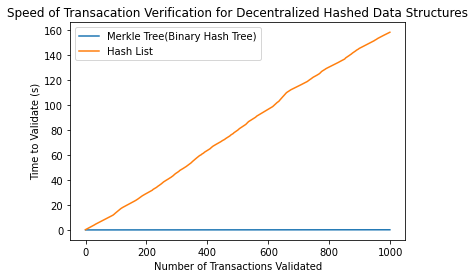

In [356]:

import matplotlib.pyplot as plt

#plot results of validating 1000 transactions for both data structures
#note, this is in linear fashion, simply how much time passes as we add one more validation
X = [i for i in range(1000)]
X_32000 = [i for i in range(32000)]
plt.ylabel("Time to Validate (s)")
plt.xlabel("Number of Transactions Validated")
plt.title("Speed of Transacation Verification for Decentralized Hashed Data Structures")
plt.plot(X, time_merkletree_1000, label = "Merkle Tree(Binary Hash Tree)")
plt.plot(X, time_hashlist, label = "Hash List")
plt.legend()


Algorithms:
  
Both solutions are ultimately successful, as our tests show that they do indeed create a unique root hash. Also, both algorithms are able to successfully retrace steps back to reach root hash. Given that there are 2^64 possible hashes, the chances that something occured due to luck or error or collision is extremely slim. 

Now let's evaluate both algorithms.

It is immediately clear that validation is significantly faster for the merkle tree than for the hash list. This is because a merkle trees validation path is only size log(n), whereas for hash lists it's size n. This is the beauty of merkle tree. For a test as big as ours, around 32,000 transactions, users would have to download all of those transactions and hash them, whereas for the merkle tree it was only 14 (log_2(2^15) - 1). The scaling drastically favors that of the merkle tree. A true time-complexity analysis will likely be impossible with all the inner functions and loops etc. but generally we can say that the time to validate using a merkle tree is O(log(n)) while the list is O(n). In fact, if I had enough computational power, I could likely show that as the input size increases, this behavior becomes noticeable. While both are secure, the tree is radically faster.

Another important part of this analysis is the special way in which I implemented my tree. Instead of a list representation of tree nodes, I instead opted for a dictionary. This is because I knew I had a reliable hashing function that could take me from node to node, which themselves have attributes. And also, recent versions of Python have ordered dictionaries. With applications of strong python programming skills, I was able to manipulate and move around python dictionaries instead of a list. The implication of all this is that my Merkle Tree traversal time is O(1). I simply have to look up in a python dictionary, which is a hash table, which does so in O(1) time. Some of the most forefront research (https://link.springer.com/chapter/10.1007/978-3-540-24676-3_32#:~:text=We%20also%20prove%20that%20the,when%20space%20efficiency%20is%20required.) has achieved a time complexity of O(logN).

Now, is this to say I've trumped the most brilliant minds in computational sciences? Not even close. The primary reason being a classic example of space-time tradeoff. Where my program excels in speed, it's space is abhorrent. Such research as mentioned above are brilliant in the sense that they achieve O(logN) space consumption as well. My 32,000 transaction dictionaries with Node classes took up 17 mb on its own... That is the biggest flaw to this implementation of a merkle tree. Because python dictionaries are relatively so space consuming, even the hash list, if we include both data structure building and validation, is on average, faster. However, to my credit, with small scale inputs, the tree is empirically speaking, efficient. We were able to verify 1000 transactions in 2 seconds, computing above 15000 hashes (plus other backend functionings of course). If I could reach O(1) traversal and O(1) space I'd likely be much richer than I am now.


##Appendix A

In [357]:
#I will use our class names for this demo because this was the best class obviously
#input list must be exponent of 2 as I defined
lst = ["Prof. Ribeiro", "Adaobi","Kalyane","Ingrid", "Chika", "Andriy", "Allison", "Chretien",
      "Felipe", "Atahan","Milana","Ha Tran", "Ryoga", "Esther", "TA1", "TA2"]

#initiate merkle tree
merk = merkle_tree(transactions = lst)

#we can print the dictionary (tree)
merk_tree = merk.tree
#print("Our Merkle Tree: " , merk_tree, "\n")

#length of tree should be 2n -1
print ("Length of Merkle Tree (2n - 1): ", len(merk.tree.keys()), "\n")

#obtain unique merkle root
print ("Merkle Root: ", merk.merkle_root, "\n")

#this obtains the authentification path. First returned item is the position, which is important to know 
#how to follow path
#second is path itself
print("Item Position and Authetification Path: ", merk.auth_path("Chretien"), "\n")

#position and path acquired from above. 4 items in paths suggests depth of 4
path_test = ['b18ba0662926a2826750d79cd2cecca2c7fe411812ad0d3e382404bebdb63fa1', 
             '622494604cfc614fb3c633ecb20d8abe7a7af99824ef15db7e9f469faed64cee', 
             '2c849f0bd394451a3d71140ecfe24f0a0c182ec0baacfb2ce38a2bb57b45d50f', 
             '2b35fd217f58d494558baf5d84a824c6b6ea3a76770e2174309e6d227c290ed2']

pos = 8

#I just wanted to show what path and position actually look like but you can easily use this code
#pos, path_test = merk.auth_path("Chretien")

#follow path, check if it matches merkle root
followed_path = merk.follow_path("Chretien", path_test, 8)
print(followed_path, followed_path == merk.merkle_root, "\n")

Length of Merkle Tree (2n - 1):  31 

Merkle Root:  4b8e30bdd05f9c14c13cf0f40fe4ef965411ebc82e53ca1340c8ef6666d1fee2 

Item Position and Authetification Path:  (8, ['b18ba0662926a2826750d79cd2cecca2c7fe411812ad0d3e382404bebdb63fa1', '622494604cfc614fb3c633ecb20d8abe7a7af99824ef15db7e9f469faed64cee', '2c849f0bd394451a3d71140ecfe24f0a0c182ec0baacfb2ce38a2bb57b45d50f', '2b35fd217f58d494558baf5d84a824c6b6ea3a76770e2174309e6d227c290ed2']) 

4b8e30bdd05f9c14c13cf0f40fe4ef965411ebc82e53ca1340c8ef6666d1fee2 True 



##Appendix B: HC and LO's

networks - In my analysis of merkle trees, why they're fascinating and more importantly, why they're important, networks is used to diagnose and better understand the system. Not only are accurate network representations presented, the effects that arise from networks are highlighted. What a centralized vs decentralized network leads to then justifies the need for security and transaction verification in decentralized digital transactions. This insight would not be possible had it not been for a robust, accurate, and meaningful application of networks

gapanalysis - Due to the nature of working with hashes and hash functions, that is, they're very difficult to identify when something goes wrong (because well, it's all scrambled), I often had to apply gap analysis to help solve my problems. As for an example, when I was debugging the "follow_path" method in the merkle_tree class, I would often arrive at the wrong solution. The wrong solution is usually very wrong, with no hints as to what mistake I made. If I scramble a string incorrectly, that's noticeable, but a different SHA-256 hash is entirely different. Thus, i engaged in gap analysis. I see that I have a goal I'd like to reach, are there any existing solutions that can help me solve this problem of retracing the autentification path. In order to narrow down my search, instead of hard-coding each combination of hashes until it's right, there's likely an algorithm that exists that can retrace the path for me. I intuitively knew this because of the inherent mathematical properties of binary trees. Surely enough, my search led me to a much simpler more elegant solution (convert depth+position into binary, binary numbers indicate where to place hash).

designthinking - this HC was monumentally important for this assignment. As there aren't many simple python merkle tree classes just lying around, I had to archetype the solution almost entirely by hand. I applied an iterative design-thinking process to hopefully reach an optimal solution. For example, the desicion to use separate Node and Tree classes was not my original intuition. I figured, if the tree is just comprised of hashes, a tree class alone should suffice. As I was building my product, I noticed that tree traversal in this manner was inefficient and unintuitive. With so many interconnected parts, I needed a strong game plan. This revision was just of many that eventually led me not only to a Node class implementation (inspired by our Trie Trees assignment) but also a dictionary as a tree, with nodes as values instead. This led me to an optimal tree traversal complexity of O(1). I would also argue that heuristics were also used in the process to eliminate bad product deicions and pick the most intuitive ones that I could tangibly code.

datastructures(LO) - two data structures were accurately and effectively implemented. Furthermore, these data structures are placed in context of their purpose, strengths, weaknesses, and compelxity. A strong justification of using this data structure as a means to a real world solution is given. Not only does merkle trees inherently allow for decentralized systems, it's also noted how the combination of hash functions lead to heightened security. That is why other data structures, such as heaps, tries, etc. were avoided. Merkle trees intuitively combine the security of hashing with efficiency of trees, offering an excellent solution to the decetralization problem, and hence, it's recent popularity with Peer-to-peer products. I would argue a very strong application of datastructures is given.

Computationalcritique(LO) - an elaborate, detailed, and comprehensive critique is given about my algorithms and data structures. From space-time resrouces, to tradeoffs, to practical benefits etc. everything is laid out onto the table as to which algorithms are effective, or which ones to prefer in certain situations. My own implementation is critiqued as well, offering insight to its performance and practicality. 

codereadability(LO) - this LO was applied out of knowledge that this data structure may not be common knowledge to everyone. While it's certainly gained more fame in recent years in light of crypto, it's far from mainstream. As such, it's important to me that this code is shareable and interpretable to external readers. Thus, even though it's not code, an elaborate over view contextualizing the problem is given. Variable names are intuitive and easy to follow, the code is concise as possible, avoiding redundancies. Good care was taken to comment wherever necessary, explaining purposes and functionalities of the code. Finally, the code accuracy is thoroughly demonstrated. This is done through a graphic presentation, code tests, and even an appendix carefully guiding a reader through, step-by-step, how to read use the code. Large python objects are downloaded and provided through github so readers can even follow along with sounds examples. This is especially one area I believe I improved upon since the beginning of the year. Code was always just for me, but through the collaborative efforts in class, as well as a growing will to produce meaningful content for others, I thoroughly tried to apply this LO better and better